In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os

In [10]:
df = pd.read_csv("customer_churn.csv")


In [11]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1901,5777-ZPQNC,Female,0,No,No,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,20.15,260.7,No
1456,3473-XIIIT,Female,0,Yes,No,16,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.00,1534.75,Yes
992,4883-KCPZJ,Female,0,Yes,Yes,22,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.25,555.4,No
5800,7129-CAKJW,Female,0,No,No,17,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Bank transfer (automatic),80.05,1345.65,No
319,6745-JEFZB,Male,0,Yes,No,35,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),91.50,3236.35,No


In [12]:
df.drop('customerID',axis='columns',inplace=True)

In [13]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [14]:
df.TotalCharges.values 

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [15]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [16]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [17]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [18]:
  df.shape

(7043, 20)

In [19]:
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [20]:
df1.loc[:, 'TotalCharges'] = pd.to_numeric(df1.TotalCharges)

C:\Users\ayush\AppData\Local\Temp\ipykernel_14000\599245994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:, 'TotalCharges'] = pd.to_numeric(df1.TotalCharges)
C:\Users\ayush\AppData\Local\Temp\ipykernel_14000\599245994.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df1.loc[:, 'TotalCharges'] = pd.to_numeric(df1.TotalCharges)


In [21]:
 df1.TotalCharges.dtypes

dtype('float64')

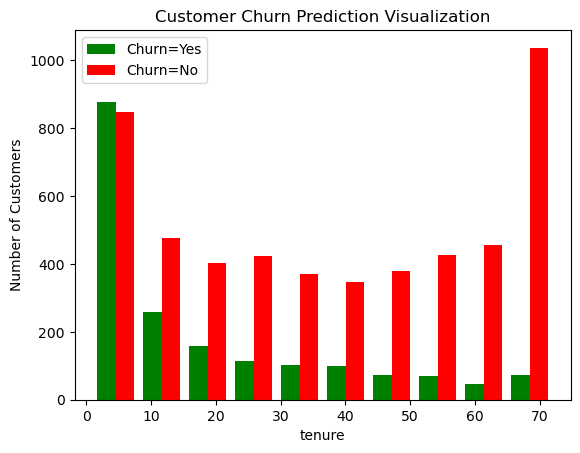

In [22]:
tenure_churn_n0=df1[df1.Churn=="No"].tenure
tenure_churn_yes=df1[df1.Churn=="Yes"].tenure
plt.xlabel("tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([tenure_churn_yes,tenure_churn_n0],color=['green','red'],label=["Churn=Yes","Churn=No"])
plt.legend()

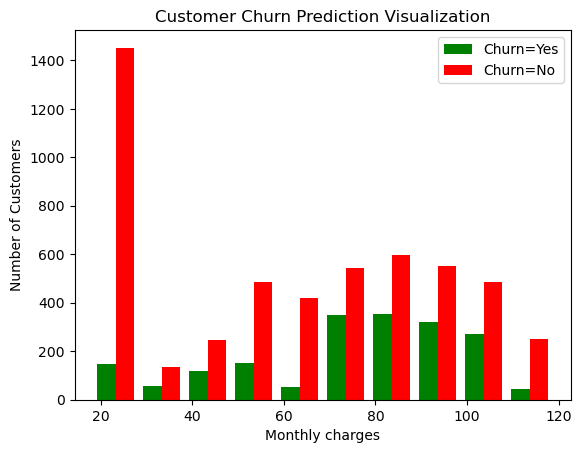

In [23]:
mc_churn_n0=df1[df1.Churn=="No"].MonthlyCharges
mc_churn_yes=df1[df1.Churn=="Yes"].MonthlyCharges
plt.xlabel("Monthly charges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([mc_churn_yes,mc_churn_n0],color=['green','red'],label=["Churn=Yes","Churn=No"])
plt.legend()

In [24]:
def print_unique_values(df):
    for col in df:
        if df[col].dtypes=='object':
             print(f'{col}: {df[col].unique()}')

In [25]:
print_unique_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [26]:


for col in df1:
    if df1[col].dtype == 'object':
        df1.loc[:, col] = df1[col].replace({'No internet service':'No','No phone service': 'No'}).infer_objects(copy=False)


print(df1)


TypeError: NDFrame.infer_objects() got an unexpected keyword argument 'copy'

In [27]:
print_unique_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [28]:
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for i in yes_no_columns:
    df1.loc[:,i]=df1.loc[:,i].replace({'Yes':1,"No":0}).infer_objects(copy=False)
for col in df1:
    print(f'{col}:{df1[col].unique()}')
    

TypeError: NDFrame.infer_objects() got an unexpected keyword argument 'copy'

In [29]:
df1.loc[:,'gender'] = df1['gender'].replace({'Female': 1, 'Male': 0}).infer_objects(copy=False)
 

TypeError: NDFrame.infer_objects() got an unexpected keyword argument 'copy'

In [30]:
df1['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [31]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [32]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3318,Male,0,No,No,10,No,No phone service,No,No,Yes,...,1,0,0,1,0,0,0,0,0,1
4677,Male,0,Yes,No,10,Yes,No,No,Yes,No,...,0,1,0,1,0,0,0,0,1,0
6173,Male,1,No,No,35,Yes,Yes,Yes,No,No,...,0,1,0,1,0,0,0,1,0,0
4102,Male,0,Yes,Yes,7,Yes,No,No,No,No,...,1,0,0,1,0,0,0,0,1,0


In [33]:
df2.loc[:, df2.dtypes == bool] = df2.loc[:, df2.dtypes == bool].replace({False: 0, True: 1})


In [34]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5208,Female,0,Yes,Yes,14,Yes,No,Yes,Yes,No,...,1,0,0,1,0,0,1,0,0,0
590,Male,0,Yes,No,72,Yes,Yes,Yes,No,Yes,...,0,1,0,0,0,1,0,1,0,0
6713,Male,1,No,No,68,Yes,Yes,No,Yes,Yes,...,0,1,0,1,0,0,0,0,1,0
6630,Male,1,No,No,16,Yes,No,No,No,No,...,0,1,0,1,0,0,0,0,1,0


In [35]:
df2.drop('customerID', axis=1, inplace=True)


KeyError: "['customerID'] not found in axis"

In [ ]:
df2.sample(4)

In [ ]:
df2.dtypes

In [ ]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges'] 

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [ ]:
df2.sample(5)

In [ ]:
for col in df2:
    print(f'{col}:{df2[col].unique()}')

In [ ]:
x=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:

X_train = X_train.astype(np.float32)
Y_train = Y_train.astype(np.int32)


In [ ]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
    
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(X_train,Y_train,epochs=100)

In [ ]:

X_test = X_test.astype(np.float32)
Y_test = Y_test.astype(np.int32)

In [ ]:
model.evaluate(X_test,Y_test)

In [ ]:
yp=model.predict(X_test)
yp[:5]

In [ ]:
Y_test[:10]

In [36]:
y_pred=[]
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

NameError: name 'yp' is not defined

In [37]:
y_pred[:10]

[]

In [38]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(Y_test,y_pred))

NameError: name 'Y_test' is not defined

In [ ]:
 import seaborn as sn
cm=tf.math.confusion_matrix(labels=Y_test,predictions=y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

ACCURACY

In [ ]:
round((872+218)/(872+127+190+218),2)

PRECISION FOR 0 CLASS
****

In [ ]:
round((872/(872+190)))